# Data analysis of the census data

## Introduction

Offering a plethora of valuable insights about the country's population, the dataset used for this assessment contains US census data from 1994. Taking place every 10 years since the 1790s, the US census data, also known as the Population and Housing Census, is designed to serve as the ‘nation’s leading provider of quality data about its people and economy’(Census.gov, 2022)
to advance equity and inform an evidence-based approach regarding the distribution of federal funds. The variables contained in the dataset provide answers to questions such as US citizen’s age, highest level of education achieved, sex, or income.

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

#1.EDA

#Importing a file and marking " ?" as missing values
census = pd.read_csv('/content/censusData (1).csv', na_values=[" ?"])

## Exploratory Data Analysis, Data Cleaning and Visualisations
The raw dataset provided for the task contains 32561 observations and 15 variables, out of which 6 are of int64 and 9 are of object data types, with missing values being represented by a ‘ ?’. I have obtained a summary statistics table to gain a deeper understanding of how the numeric variables are distributed. As argued by Walker (2020), this knowledge can greatly inform our further analysis, as it is at this point that outliers or unexpected values can be identified. Several abnormalities were noticed – the capital-gain variable was proved to not only be highly skewed but alongside the capital-loss variable it was shown to have a large standard deviation, indicating a likely presence of outliers. Following, I conducted a check of unique values for each categorical variable, which showed me that there were blank spaces preceding each of them. As I did not intend to use all categories and variables for my data visualisations, I have only adjusted the ‘sex’ variable’s categories. As missing values can have a major impact on the analysis, I have checked and sorted them in ascending order – 3 categorical variables were shown to have missing values. Using a Missingno library I have visualised the missing values. As dropping an immense number of rows containing missing data could impact the reliability of the analysis, I have decided to impute those with a category of ‘Other’. Lastly, I got rid of the 24 duplicated rows that I found to have duplicate values.

In [ ]:
#Exploring the shape of the dataset
nrow, ncol=census.shape

nrow, ncol

(32561, 15)

In [ ]:
#Exploring the shape, missing values and data types of the values within the dataset
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        30725 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       30718 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13  native-country   31978 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#Describe() just for numerical variables
numeric_census = census.select_dtypes(include = "int64").copy()
numeric_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Changing ' hours-per-week' to 'hours-per-week'
census.rename(columns={' hours-per-week':'hours-per-week'}, inplace=True)

In [ ]:
#EDA for categorical variables
categorical_census = census.select_dtypes(include = "object").copy()
categorical_census.head()

#A code to get unique values for each categorical column:
for column in census.select_dtypes(include=['object']).columns:
    unique_values = census[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values for education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values for marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values for occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Unique values for relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Unique values for race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer

In [ ]:
#Changing the category names for sex
census['sex'] = census['sex'].replace(' Female', 'Female')
census['sex'] = census['sex'].replace(' Male', 'Male')

In [ ]:
#2.Data cleaning

census.isna().sum().sort_values()

age                  0
fnlwgt               0
education            0
education-num        0
marital-status       0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
income               0
native-country     583
workclass         1836
occupation        1843
dtype: int64

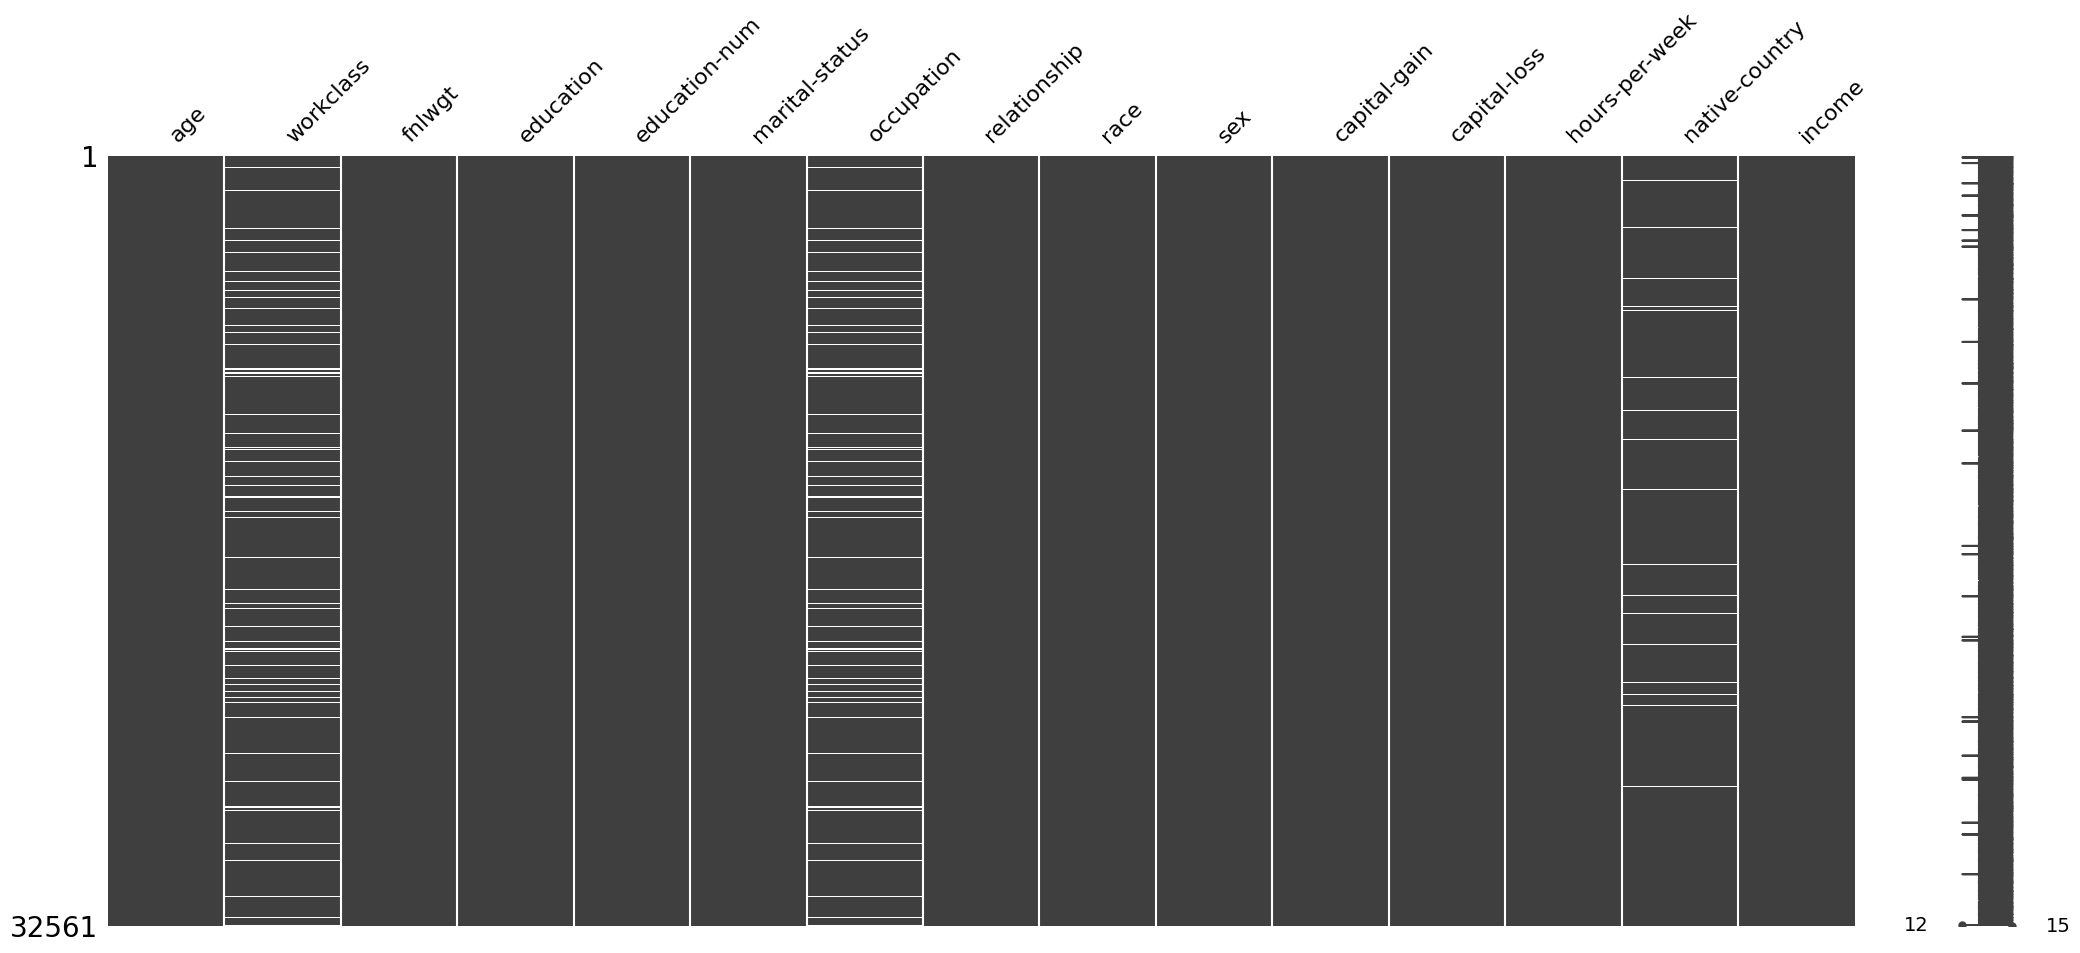

In [ ]:
#Visualising missing data
msno.matrix(census)
plt.show()

In [ ]:
#To not lose data encoding missing values to a seperate category - Other
cols = ['native-country', 'workclass', 'occupation']
census[cols] = census[cols].fillna('Other')
census.isna().sum().sort_values()

(32561, 15)

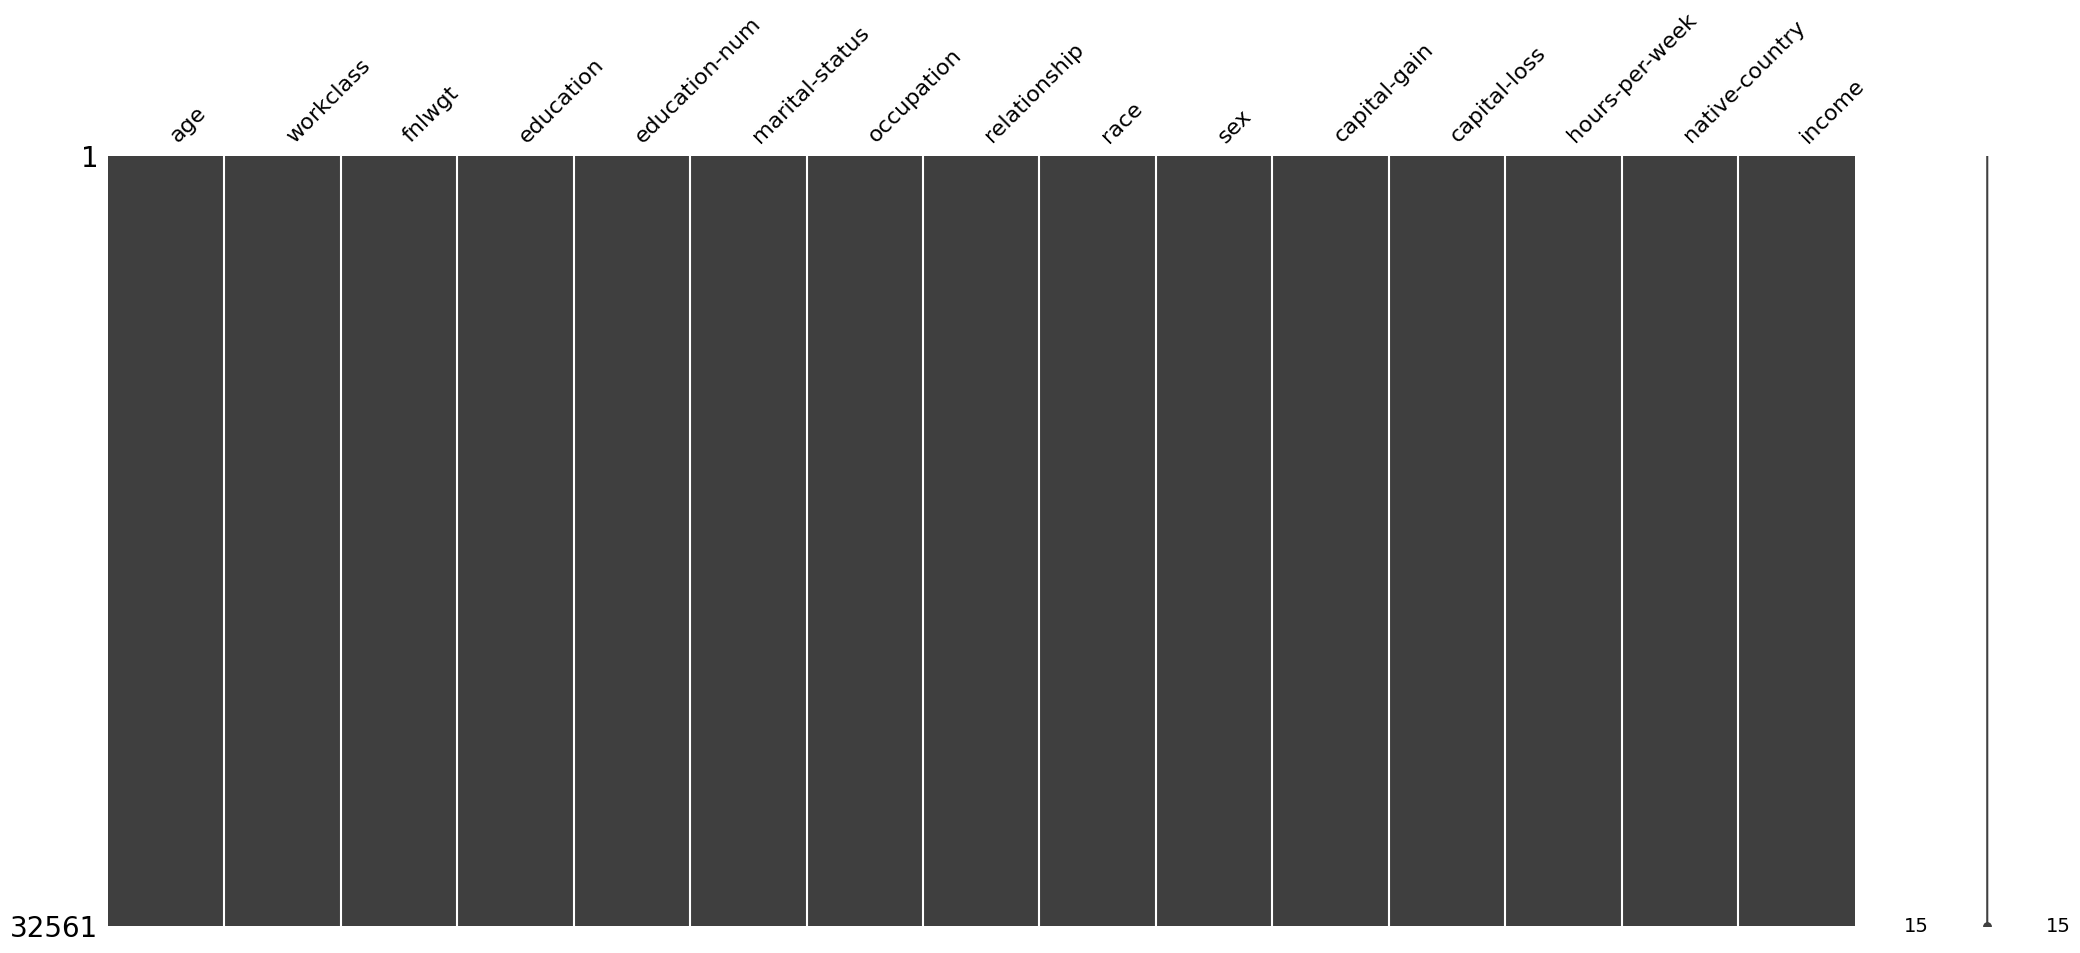

In [ ]:
#Visualising the missing data agin, to ensure I got rid of it
msno.matrix(census)
plt.show()

In [ ]:
#Checking for duplicates
duplicates = census.duplicated().sum()
duplicates

24

In [ ]:
#Getting rid of duplicates
census.drop_duplicates(inplace=True)

In [ ]:
duplicates

24

Known to be the ‘go-to visualisation tool’ (Walker, 2020) for statisticians, histograms offer a clear and meaningful way to illustrate the shape of the distribution, which matters particularly for statistical tests that assume that variables are normally distributed (McKinney, 2013). The distribution of age for this dataset is right-skewed, with the mean age being approximately 38.5
years and the standard deviation equal to 13.64 years. To compare the distribution of hours worked per week by sex, I have decided to create an overlay histogram that illustrates the differences in an effective manner. Turns out that men tend to work on average 6 hours more per week than women. On top of comprehensibly illustrating the differences between sexes, the histogram could also be useful for asking questions about the root of the differences and could lead to identifying barriers in the paid labour participation of females. If the difference is only 6 hours on average, how come
there are so few women earning above >50K?

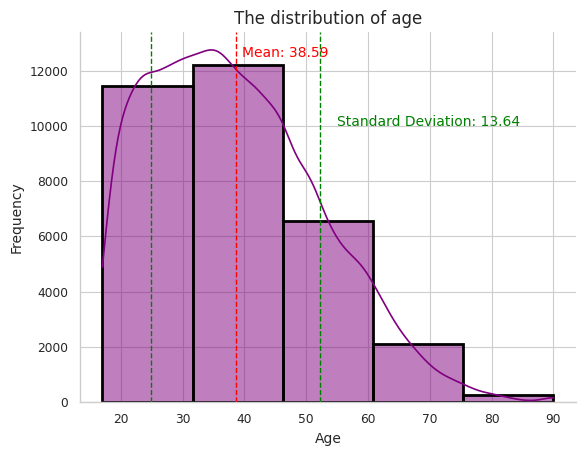

In [ ]:
#3. Data visualisation

#The distribution of age with histogram
sns.set(style="whitegrid")
sns.set_context("paper")
std_age = census['age'].std()
mean_age = census['age'].mean()

hist = sns.histplot(census, x="age", bins=5, kde=True, edgecolor="black", linewidth=2, color="purple")
plt.title("The distribution of age", fontsize=12)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.text(x=55, y=10000, s=f'Standard Deviation: {std_age:.2f}', fontsize=10, color='green')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_age + std_age, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_age - std_age, color='green', linestyle='dashed', linewidth=1)
plt.text(x=mean_age + 1, y=12500, s=f'Mean: {mean_age:.2f}', fontsize=10, color='red')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

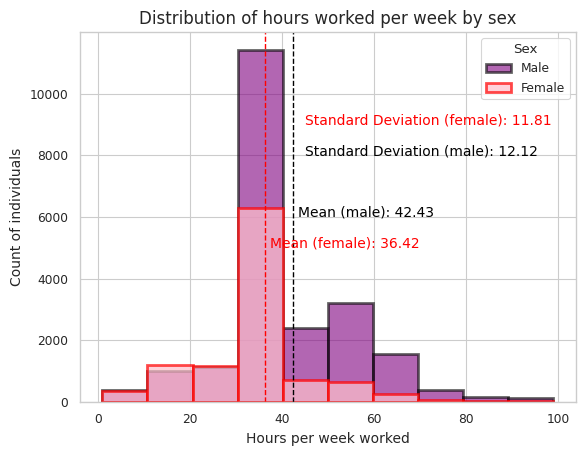

In [ ]:
# Calculate the standard deviation and mean hours-per-week for females and males
female_std_hours = census[census['sex'] == "Female"]['hours-per-week'].std()
female_mean_hours = census[census['sex'] == "Female"]['hours-per-week'].mean()
male_std_hours = census[census['sex'] == "Male"]['hours-per-week'].std()
male_mean_hours = census[census['sex'] == "Male"]['hours-per-week'].mean()
# Layered histogram plots
census[census["sex"]=="Male"]["hours-per-week"].hist(alpha=0.6, color="purple", edgecolor="black", linewidth=2)
census[census["sex"]=="Female"]["hours-per-week"].hist(alpha=0.7, color="pink", edgecolor="red", linewidth=2)
plt.title('Distribution of hours worked per week by sex', fontsize=12)
plt.xlabel('Hours per week worked', fontsize=10)
plt.ylabel('Count of individuals', fontsize=10)
plt.legend(["Male", "Female"], title='Sex')
plt.axvline(female_mean_hours, color='red', linestyle='dashed', linewidth=1)
plt.axvline(male_mean_hours, color='black', linestyle='dashed', linewidth=1)
plt.text(x=female_mean_hours + 1, y=5000, s=f'Mean (female): {female_mean_hours:.2f}', fontsize=10, color='red')
plt.text(x=male_mean_hours + 1, y=6000, s=f'Mean (male): {male_mean_hours:.2f}', fontsize=10, color='black')
plt.text(x=45, y=9000, s=f'Standard Deviation (female): {female_std_hours:.2f}', fontsize=10, color='red')
plt.text(x=45, y=8000, s=f'Standard Deviation (male): {male_std_hours:.2f}', fontsize=10, color='black')
plt.show()


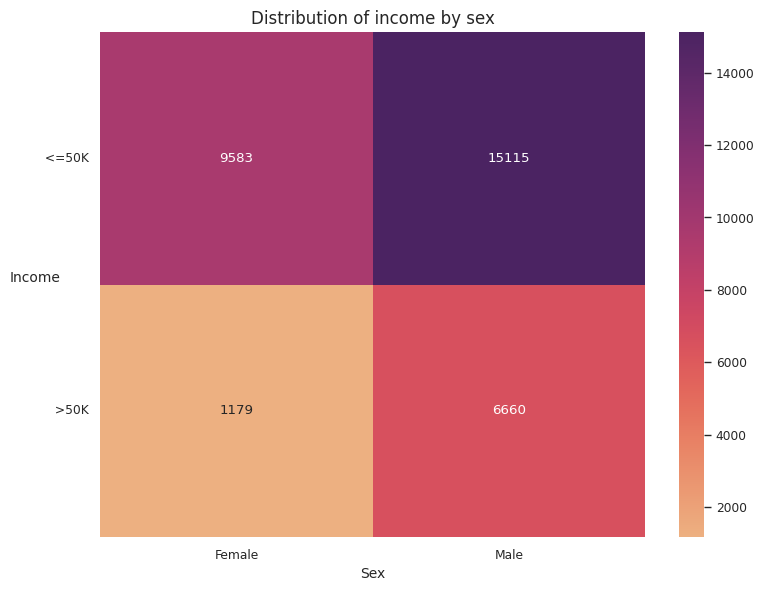

In [ ]:
#Figure 5) Heatmap of distribution of income by sex
census_heatmap = pd.DataFrame({
    x: grp['income'].value_counts()
    for x, grp in census.groupby('sex')
})
plt.figure(figsize=(8,6))
sns.heatmap(census_heatmap, cmap='flare', annot=True, fmt="d")
plt.title('Distribution of income by sex', fontsize=12)
plt.xlabel('Sex', fontsize=10)
_=plt.ylabel('Income', fontsize=10, rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

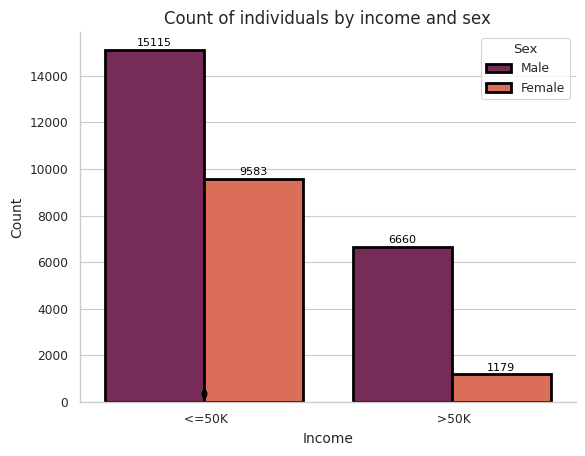

In [ ]:
#Figure 6) The relationship between a categorical and numeric variable with bar plots
sns.countplot(data=census, x='income', hue='sex', palette='rocket', edgecolor="black", linewidth=2)
plt.title('Count of individuals by income and sex', fontsize=12)
plt.xlabel('Income', fontsize=10)
plt.ylabel('Count', fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.legend(title='Sex', loc="upper right")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

As a ‘great tool for visualising values outside of a certain range’(Walker, 2020), a boxplot was chosen to identify both the interquartile ranges and outliers. The maximum value,median, and 1st quartile are surprisingly the same for both sexes, with means being almost identical. However, the minimum value of years in education for men is lower than for women, and the 3rd quartile is larger for men suggesting that the variance is larger for the former. Having
the differences displayed can initiate questions about the root of the gender gap and potentially inform strategies to eliminate gender-based discrimination in the education system.

<ipython-input-216-67344fd9a50d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='education-num', data=census, palette="rocket", widths=0.65)


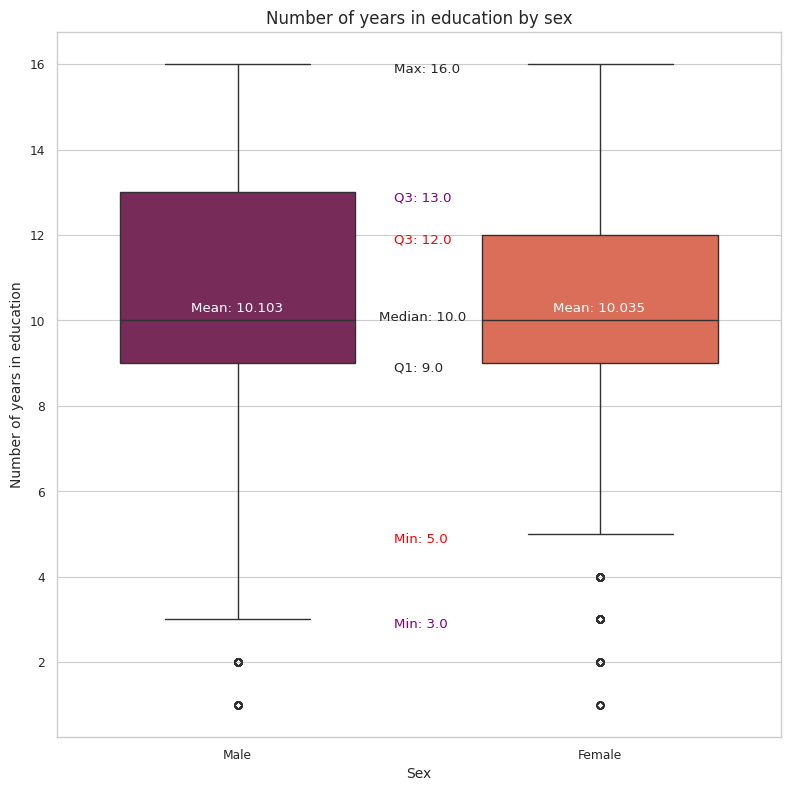

In [ ]:
# Figure 7) Boxplot for the number of years in education by sex
plt.figure(figsize=(8, 8))
sns.boxplot(x='sex', y='education-num', data=census, palette="rocket", widths=0.65)
plt.text(0.43, 8.80, 'Q1: 9.0')
plt.text(0.39, 10, 'Median: 10.0')
plt.text(0.43, 11.80, 'Q3: 12.0', color="red")
plt.text(0.43, 12.80, 'Q3: 13.0', color="purple")
plt.text(-0.13, 10.2, "Mean: 10.103", color="white")
plt.text(0.87, 10.2, "Mean: 10.035", color="white")
plt.text(0.43, 2.8, "Min: 3.0", color="purple")
plt.text(0.43, 4.8, "Min: 5.0", color="red")
plt.text(0.43, 15.8, "Max: 16.0")
plt.title('Number of years in education by sex', fontsize=12)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Number of years in education', fontsize=10) # Set custom tick labels
plt.tight_layout()
plt.show()

In [ ]:
#Finding exact values for the boxplot
quartiles = census.groupby('sex')['education-num'].quantile([0.25, 0.5, 0.75])
mean_values = census.groupby('sex')['education-num'].mean()
max = census.groupby("sex")["education-num"].max()
min = census.groupby("sex")["education-num"].min()

print(quartiles)
print(mean_values)
print(max)
print(min)

sex         
Female  0.25     9.0
        0.50    10.0
        0.75    12.0
Male    0.25     9.0
        0.50    10.0
        0.75    13.0
Name: education-num, dtype: float64
sex
Female    10.035744
Male      10.102891
Name: education-num, dtype: float64
sex
Female    16
Male      16
Name: education-num, dtype: int64
sex
Female    1
Male      1
Name: education-num, dtype: int64


Including the age, capital gain and sex in one scatter plot, allowed for capturing the relationship between multiple variables and allowed for a more intuitive data analysis (McKinney, 2013). The highest possible capital gain (of $100,000) is mostly associated with men, who I found to make almost 87% of individuals with a capital gain of $80,000 or more, compared to only 13% of women. That would further indicate gender inequities regarding economic opportunities in the US and could inform government policies supporting women in
paid labour.

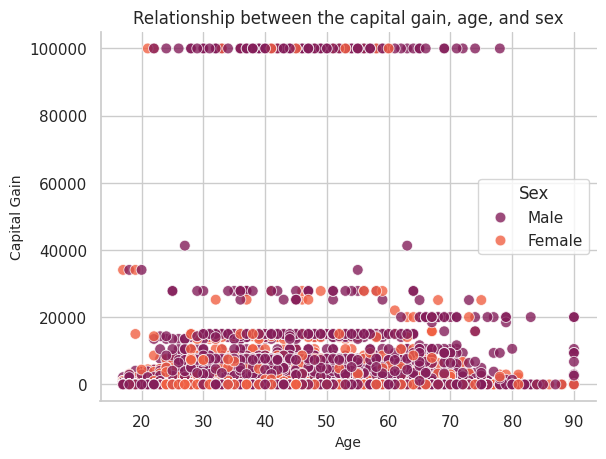

In [ ]:
# Figure 8) Scatterplot of the relationshio between the capital gain, age and sex
sns.set_style("whitegrid")
sns.set_context("notebook")

sns.scatterplot(x='age', y='capital-gain', hue="sex", data=census, palette="rocket", markers=['s', 'v'], alpha=0.8, s=60)
plt.title('Relationship between the capital gain, age, and sex', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Capital Gain', fontsize=10)
plt.legend(title="Sex", loc="right")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [ ]:
# Filter the dataset to include only observations where the capital gain is over 80000
high_capital_gain = census[census['capital-gain'] > 80000]

# Calculate the proportions of females and males in the filtered dataset
proportions = high_capital_gain['sex'].value_counts(normalize=True)

# Display the proportions
print("Proportion of females with capital gain over 80000:", proportions['Female'])
print("Proportion of males with capital gain over 80000:", proportions['Male'])

Proportion of females with capital gain over 80000: 0.13157894736842105
Proportion of males with capital gain over 80000: 0.868421052631579


I have decided to highlight the differences in average capital gain by race and sex using a bar plot. Asian-Pac-Islander race is characterised by the highest average capital gain for males, while Amer-Indian-Eskimo with the lowest. The value is lower for women than men across all races, with white women being in the best financial position across women of all groups. Clear disparities both between women and men across all races, as well as between people of different races are alarming and a signal of significant structural inequalities, that
should be addressed by the policymakers.

<ipython-input-79-1fbf012b5d84>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=census, x='race', y='capital-gain', hue='sex', palette='flare', ci=None)


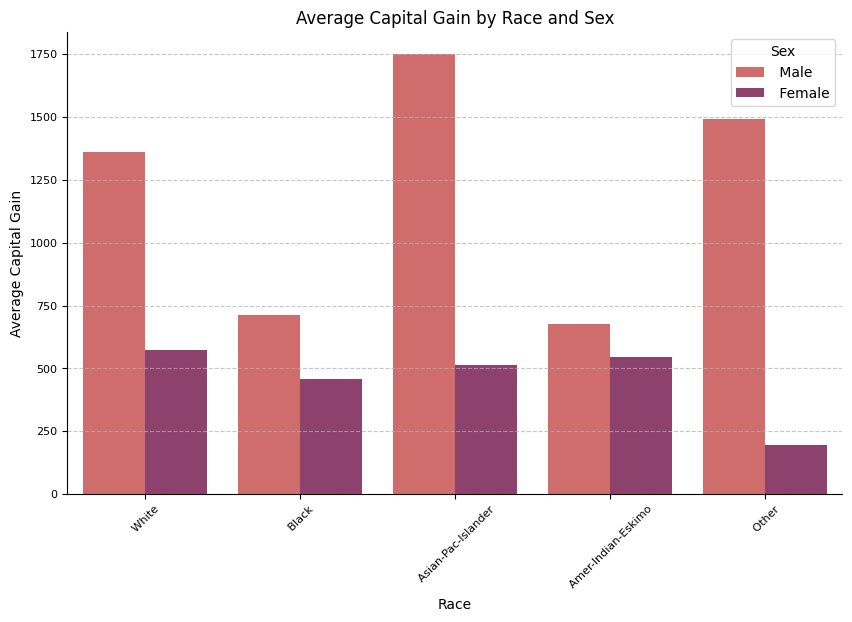

In [ ]:
# Figure 9) The bar plot of the average capital by race and sex
plt.figure(figsize=(10, 6))
sns.barplot(data=census, x='race', y='capital-gain', hue='sex', palette='flare', ci=None)
plt.title('Average Capital Gain by Race and Sex', fontsize=12)
plt.xlabel('Race', fontsize=10)
plt.ylabel('Average Capital Gain', fontsize=10)
plt.legend(title='Sex', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

Text(0, 0.5, 'Relationship types')

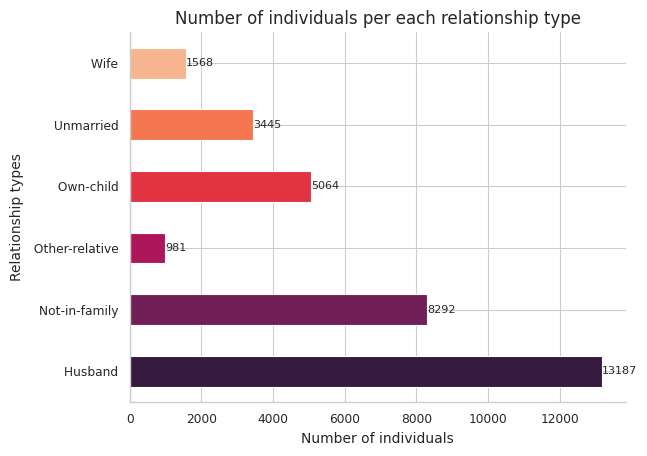

In [ ]:
# @title relationship
census.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('rocket'))
# Add annotations for counts on the bars
for i, count in enumerate(census.groupby('relationship').size()):
    plt.text(count, i, str(count), ha='left', va='center', fontsize=8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Number of individuals per each relationship type', fontsize=12)
plt.xlabel('Number of individuals', fontsize=10)
plt.ylabel('Relationship types', fontsize=10)

Lastly, to best illustrate where individuals taking the census are natively from, I have created a map that highlights all countries from the native-country column in pink. Country names needed some cleaning up – I had to get rid of Yugoslavia and Other from the column, as well as change the names of the countries so that they are correct and recognisable by the GeoPandas library.

In [ ]:
#Native-country column cleaning to prepare for Figure 10) map plot
census['native-country'] = census['native-country'].str.strip()
census = census[~census['native-country'].isin(['Other', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)'])]
census.loc[census['native-country'] == 'USA', 'native-country'] = 'United States of America'
census.loc[census['native-country'] == 'South', 'native-country'] = 'South Korea'
census.loc[census['native-country'] == 'Puerto-Rico', 'native-country'] = 'Puerto Rico'
census.loc[census['native-country'] == 'Dominican-Republic', 'native-country'] = 'Dominican Republic'
census.loc[census['native-country'] == 'Trinadad&Tobago', 'native-country'] = 'Trinidad and Tobago'
census.loc[census['native-country'] == 'Holand-Netherlands', 'native-country'] = 'Netherlands'
census.loc[census['native-country'] == 'El-Salvador', 'native-country'] = 'El Salvador'
unique_countries = census['native-country'].value_counts()
print(unique_countries)

Number of unique countries: 39
United States of America    29170
Mexico                        643
Philippines                   198
Germany                       137
Canada                        121
Puerto Rico                   114
El Salvador                   106
India                         100
Cuba                           95
England                        90
Jamaica                        81
South Korea                    80
China                          75
Italy                          73
Dominican Republic             70
Vietnam                        67
Guatemala                      64
Japan                          62
Poland                         60
Columbia                       59
Taiwan                         51
Haiti                          44
Iran                           43
Portugal                       37
Nicaragua                      34
Peru                           31
Greece                         29
France                         29
Ecuador          

<ipython-input-88-9d9b8224b499>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


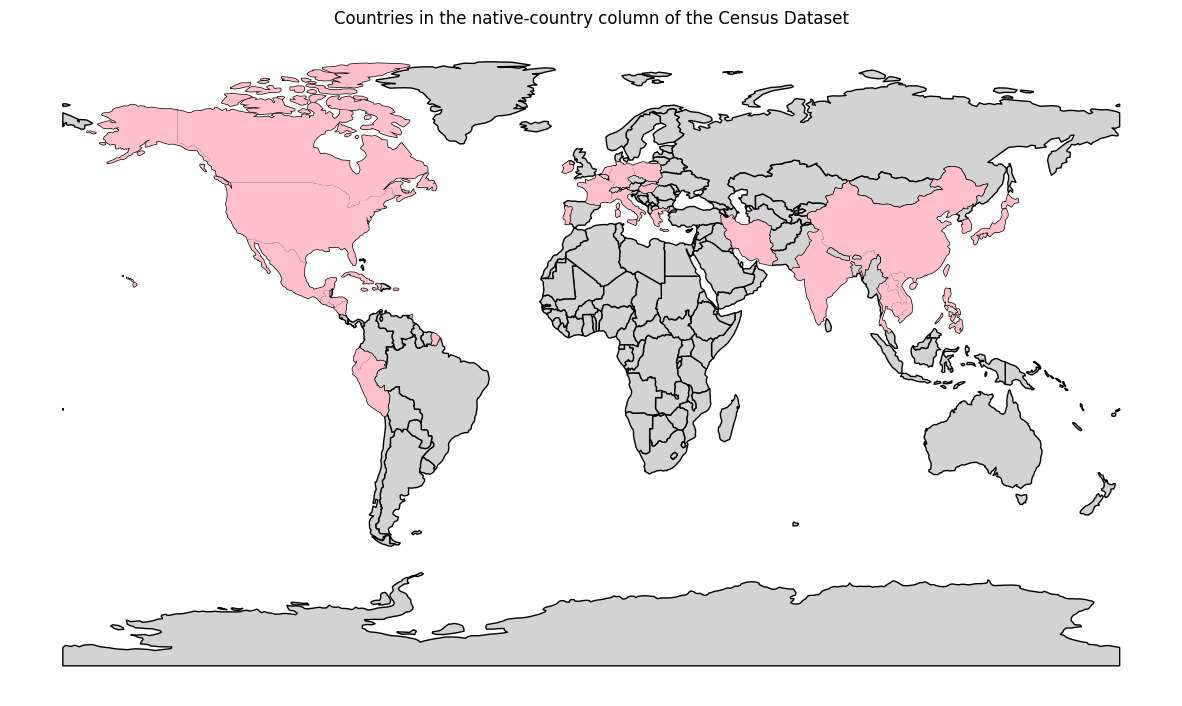

In [ ]:
# Figure 10) Plotting the world map with values from native-country column
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
country_counts = census['native-country'].value_counts()
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
world[world['name'].isin(country_counts.index)].plot(ax=ax, color='pink')
ax.set_axis_off()
plt.title('Countries in the native-country column of the Census Dataset')
plt.show()

## Recommended Data Pre-processing

Referring to the transformations that need to be applied to the raw data before feeding it into the Machine Learning models, data pre-processing is crucial to improve data quality, enhance model performance, and avoid any bias (Layton, 2015). On top of the data pre-processing already completed, several more tasks could be completed. As Machine Learning algorithms rely on numerical features to learn, all categorical variables will need to be encoded into dummy variables in the process of Feature Engineering, to guarantee reliable results (Layton, 2015). That could easily be done using the Pandas library with apply() for binary categorical variables or get_dummies() for categorical variables with more than 2 categories. Next, as extreme values can skew our data having an immense impact on our analysis, ‘particularly when we are using parametric techniques that assume a normal distribution’ (Walker, 2020), outliers should be identified and handled. For continuous variables they are defined by the ‘1.5xIQR’ rule – if the distance above the 3rd quartile and below the 1st quartile
is more than 1.5 times the interquartile range – the value can be considered an outlier and removed from the dataset (Walker, 2020). As the distribution of classes in the target categorical variables can also be highly skewed due
to the problem of class imbalance, it is crucial to ensure an even spread of each category to avoid biased models that would favour the majority class. That could be done while splitting the dataset into training and testing sets using the train_test_split() and making sure to use the stratify parameter, to ensure that the class distribution is even in both sets. For models that assume chosen dataset features to have low variance, same scales, as well as being related in a linear fashion (e.g. K-Nearest Neighbours, Linear Regression) a process of standardisation would be needed if the variables do not meet these conditions. Used to transform continuous data to appear normally distributed, the methods of standardisation such as log normalisation or scaling should be applied to the data.

In [ ]:
#4. Data pre-processing

#Class imbalance check on categorical variables
census["sex"].value_counts(normalize=True)
census["income"].value_counts(normalize=True)
census["occupation"].value_counts(normalize=True)

 Prof-specialty       0.134774
 Craft-repair         0.133440
 Exec-managerial      0.132365
 Adm-clerical         0.122729
 Sales                0.118823
 Other-service        0.107266
 Machine-op-inspct    0.065174
 Transport-moving     0.051989
 Handlers-cleaners    0.044599
 Farming-fishing      0.032359
 Tech-support         0.030210
 Protective-serv      0.021128
 Priv-house-serv      0.004851
 Armed-Forces         0.000293
Name: occupation, dtype: float64

In [ ]:
#Feature engineering - encoding categorical variables to be numeric (39/str.20)

#Binary categorical variables

census["sex"] = census["sex"].apply(lambda val: 1 if val.strip() == "Female" else 0)
census["income"] = census["income"].apply(lambda val: 1 if val.strip() == " >50K" else 0)


#One-hot encoding for a categorical variable with >2 categories
print(pd.get_dummies(census["occupation"]))

print(census.head(20))

<Axes: xlabel='capital-gain', ylabel='Count'>

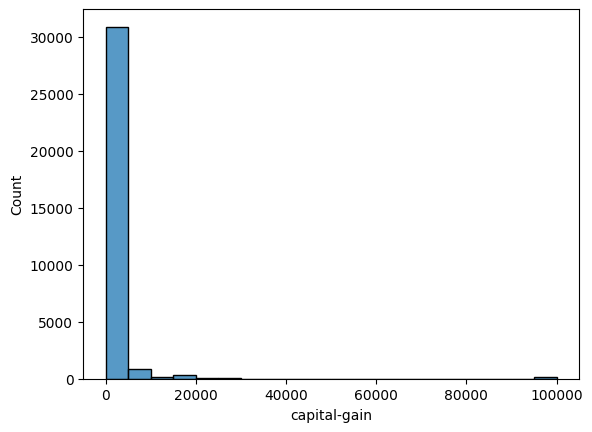

In [ ]:
sns.histplot(x="capital-gain", bins=20, data=census)

In [ ]:
#Log normalisation
census["capital-gain-log"] = np.log(census['capital-gain'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='capital-gain-log', ylabel='Count'>

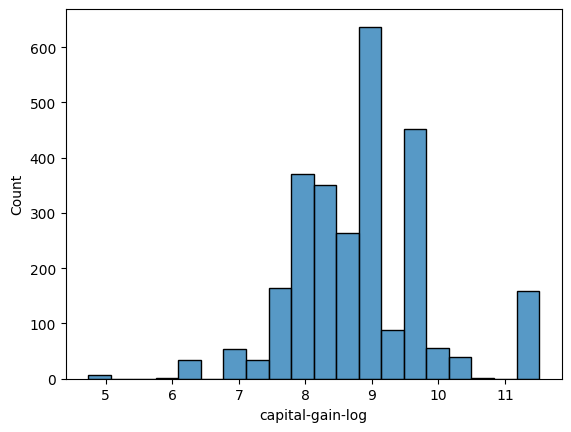

In [ ]:
sns.histplot(x='capital-gain-log', bins=20, data=census)

## Conclusion

Throughout this analysis I have explored the 1994 US census data, particularly focusing on the sex as the predictor variable having an impact on several different target variables. Data visualisations created could be of particular use to the government bodies responsible for policymaking or resource allocation, as they communicate complex social issues in an accessible and clear manner. On top of the different ways that provided data visualisations
could be applied, I have also recommended numerous steps for pre-processing the census data for the Machine Learning algorithms.

## References:

Census.gov, 2022. Our Censuses. Available at: https://www.census.gov/programs-surveys/censuses.html#:~:text=Also%20known%20as%20the%20Population,takes%20place%20every%2010%20years (Accessed on: 11/03/2024).

Layton, R., 2015. Learning Data Mining with Python: Harness the power of Python to analyze data and create insightful predictive models. Birmingham: Packt Publishing Ltd.

McKinney, W., 2013. Python for Data Analysis. Sebastopol, CA: O’Reilly Media, Inc.

Walker, M., 2020. Python Data Cleaning Cookbook: Modern Techniques and Python tools to detect and remove dirty data and extract key insights. Birmingham: Packt Publishing Ltd.